Importing the Dependencies

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and Processing

In [93]:
# loading the data from csv file to Pandas DataFrame
data = pd.read_csv('/content/Sales ML 1.csv')


In [94]:
# first 5 rows of the dataframe
data.head()

,Category,Sub category,PRODUCT BRANDS,Item Name,Item Disc %,Item disc amount,Profit %,Item Net Amount,profit,MRP,Net cost,quantity,Sales,weight
0,NON FOOD,NATURAL PERSONAL CARE,EYE DROP,SAUMYA EYE DROP 10 ML,8.0,2.500000,16.53831,32.20,4.08000,35,31.250000,1,31.25,0.030
1,FOOD,JUICES & NATURAL BEVERAGES,MEDICINE,GILOY GHAN VATI 60 PC (NEW),10.0,8.928571,13.98176,90.00,9.85714,100,89.285714,1,89.29,0.060
2,FOOD,JUICES & NATURAL BEVERAGES,SHARBAT THANDAI,GULAB SHARBAT 750 ML,8.0,6.779661,16.76816,92.00,11.19610,100,84.745763,1,84.75,1.130
3,FOOD,PHYSICAL OIL & GHEE,GHEE,COWS GHEE 15 LTR,8.3,3855.053571,0.52727,47702.34,223.39500,8670,7741.071429,6,46446.43,86.880
4,FOOD,JUICES & NATURAL BEVERAGES,MURRABBA & CANDY,AMLA CHATPATA CANDY 500 G,10.0,325.714286,13.67105,3078.00,352.55857,180,171.428571,19,3257.14,11.381


In [95]:
# number of data points & number of features
data.shape

(15856, 14)

In [96]:
# getting some information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15856 entries, 0 to 15855
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          15856 non-null  object 
 1   Sub category      15856 non-null  object 
 2   PRODUCT BRANDS    15856 non-null  object 
 3   Item Name         15856 non-null  object 
 4   Item Disc %       15856 non-null  float64
 5   Item disc amount  15856 non-null  float64
 6   Profit %          15856 non-null  float64
 7   Item Net Amount   15856 non-null  float64
 8   profit            15856 non-null  float64
 9   MRP               15856 non-null  int64  
 10  Net cost          15856 non-null  float64
 11  quantity          15856 non-null  int64  
 12  Sales             15856 non-null  float64
 13  weight            15856 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 1.7+ MB


Categorical Features:
- Category
- Sub category
- PRODUCT BRANDS
- Order Date
- Item Name


In [97]:
# checking for missing values
data.isnull().sum()

Category            0
Sub category        0
PRODUCT BRANDS      0
Item Name           0
Item Disc %         0
Item disc amount    0
Profit %            0
Item Net Amount     0
profit              0
MRP                 0
Net cost            0
quantity            0
Sales               0
weight              0
dtype: int64

Handling Missing Values

Mean --> average

Mode --> more repeated value

In [98]:
# mean value of "Weight" column
data['weight'].mean()

2.139942167003027

Data Analysis

In [99]:
data.describe()

,Item Disc %,Item disc amount,Profit %,Item Net Amount,profit,MRP,Net cost,quantity,Sales,weight
count,15856.000000,15856.000000,15856.000000,15856.000000,15856.000000,15856.000000,15856.000000,15856.00000,15856.000000,15856.000000
mean,5.244960,38.214237,19.015875,631.451365,37.938506,113.590565,102.243051,8.57997,627.481983,2.139942
std,5.702808,112.041718,103.522553,1401.224148,95.121062,240.485730,216.399086,28.02450,1378.675447,5.822805
min,0.000000,0.000000,-98.789550,0.830000,-1308.500340,1.000000,0.847458,1.00000,0.850000,0.001000
25%,0.000000,0.000000,7.769217,27.600000,2.503520,15.000000,15.000000,1.00000,28.570000,0.084000
50%,7.000000,1.785714,13.673010,77.635000,7.387830,50.000000,42.857143,2.00000,76.190000,0.276000
75%,10.000000,18.750000,18.691540,542.800000,36.447860,100.000000,89.523810,8.00000,542.860000,1.140000
max,99.500000,3942.857143,3089.356660,47702.340000,2059.650000,8670.000000,7741.071429,1800.00000,46446.430000,257.000000


Numerical Features

In [100]:
sns.set()

<ipython-input-101-cfac0ad5156f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['weight'])


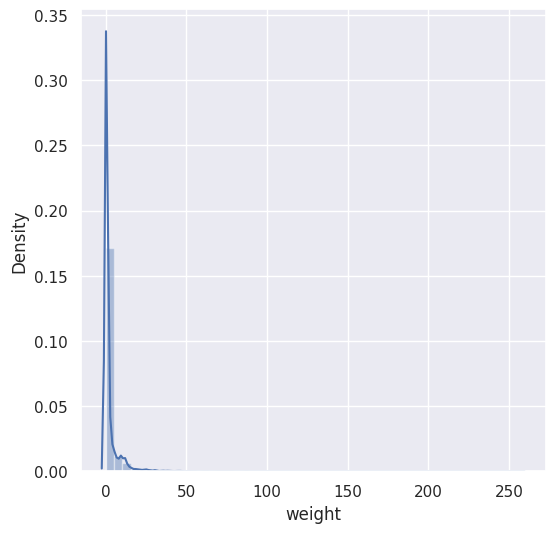

In [101]:
# Item Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(data['weight'])
plt.show()

<ipython-input-102-fd6614d7dc66>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MRP'])


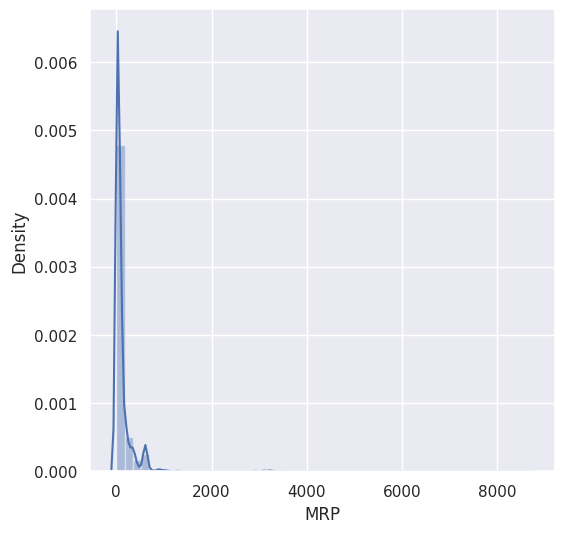

In [102]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(data['MRP'])
plt.show()

<ipython-input-103-287d1584873a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sales'])


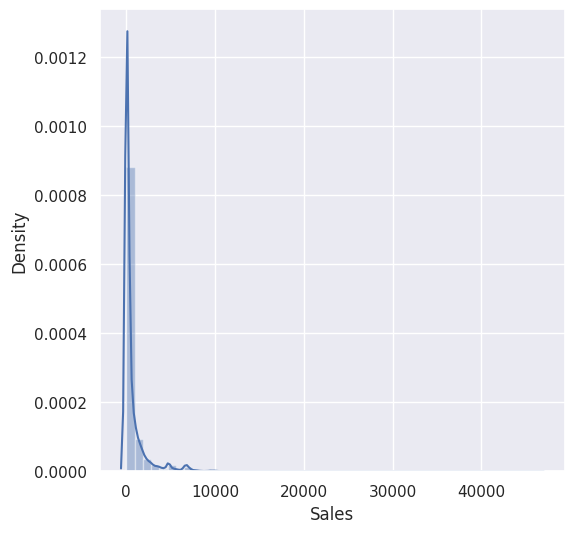

In [103]:
# Items Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(data['Sales'])
plt.show()

Categorical Features

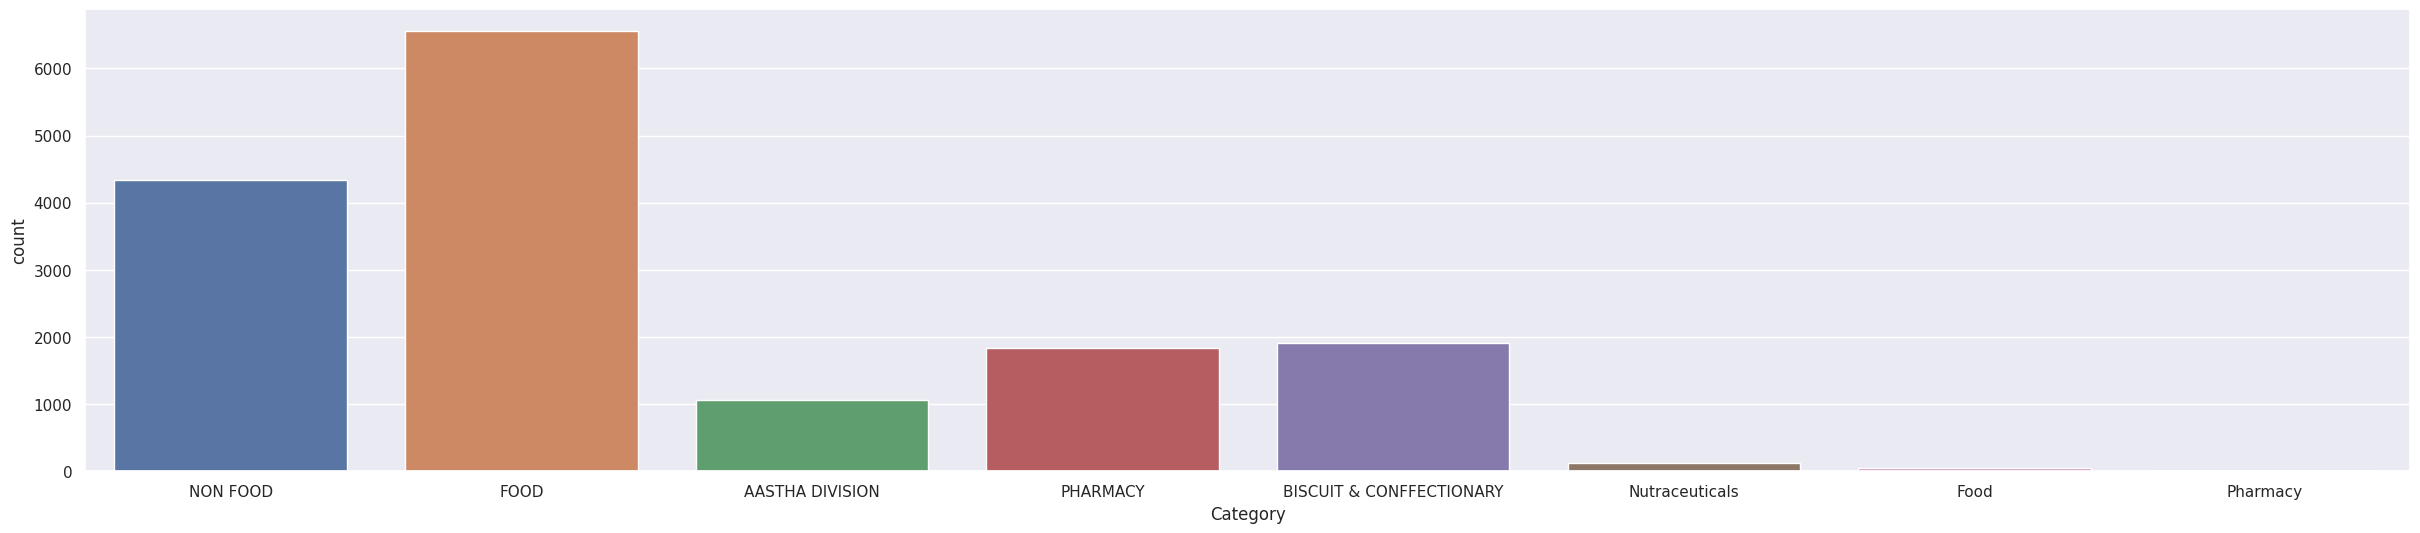

In [104]:
# Item Category column
plt.figure(figsize=(30,6))
sns.countplot(x='Category', data=data)
plt.show()

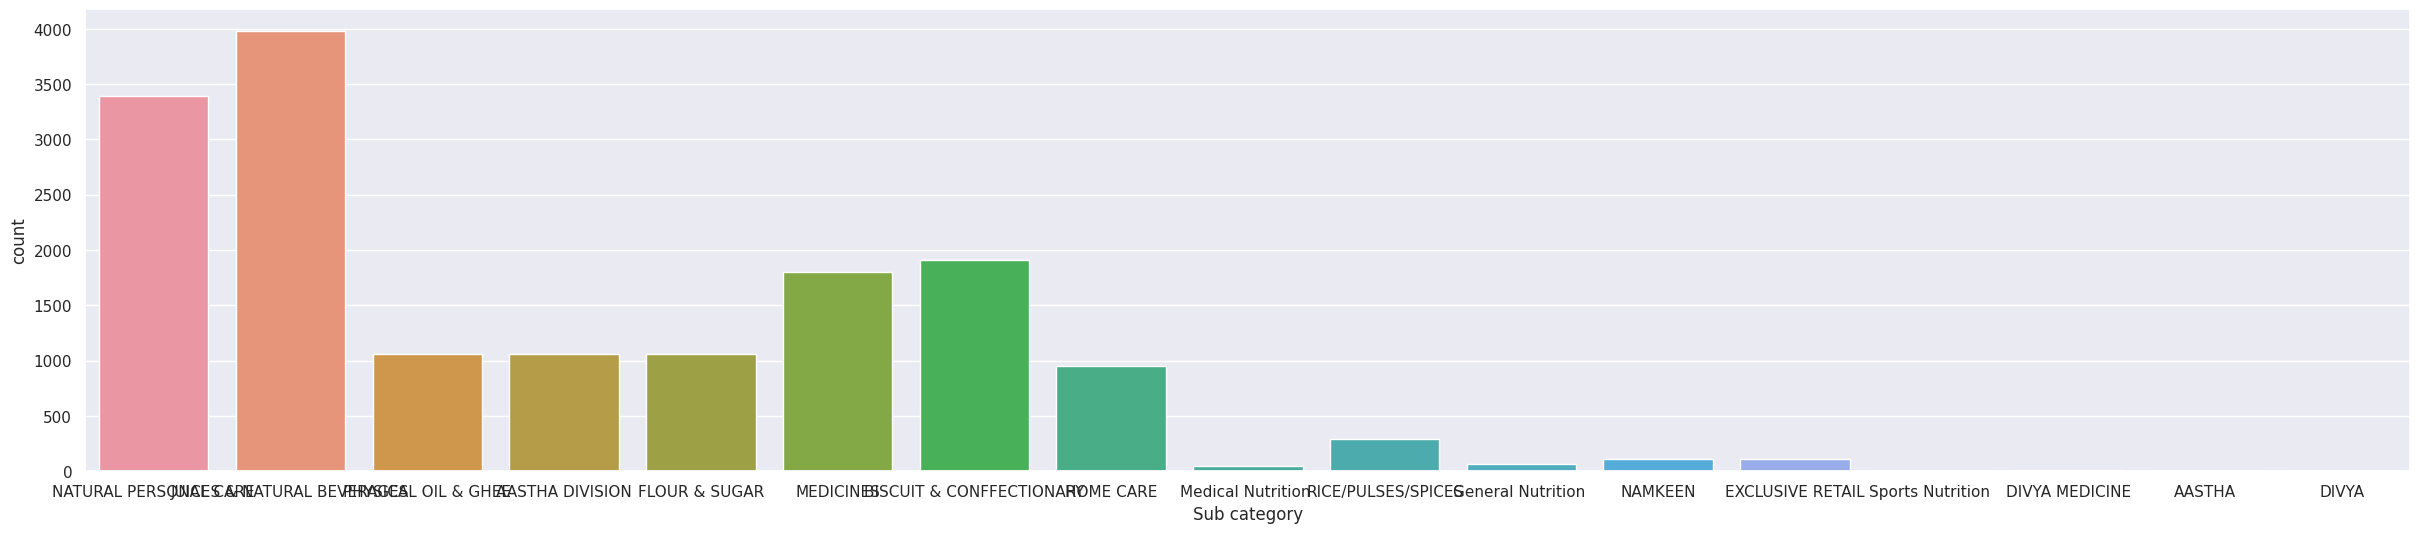

In [105]:
# Item Subcategory column
plt.figure(figsize=(30,6))
sns.countplot(x='Sub category', data=data)
plt.show()

Data Pre-Processing

In [106]:
data.head(10)

,Category,Sub category,PRODUCT BRANDS,Item Name,Item Disc %,Item disc amount,Profit %,Item Net Amount,profit,MRP,Net cost,quantity,Sales,weight
0,NON FOOD,NATURAL PERSONAL CARE,EYE DROP,SAUMYA EYE DROP 10 ML,8.0,2.500000,16.53831,32.20,4.08000,35,31.250000,1,31.25,0.030
1,FOOD,JUICES & NATURAL BEVERAGES,MEDICINE,GILOY GHAN VATI 60 PC (NEW),10.0,8.928571,13.98176,90.00,9.85714,100,89.285714,1,89.29,0.060
2,FOOD,JUICES & NATURAL BEVERAGES,SHARBAT THANDAI,GULAB SHARBAT 750 ML,8.0,6.779661,16.76816,92.00,11.19610,100,84.745763,1,84.75,1.130
3,FOOD,PHYSICAL OIL & GHEE,GHEE,COWS GHEE 15 LTR,8.3,3855.053571,0.52727,47702.34,223.39500,8670,7741.071429,6,46446.43,86.880
4,FOOD,JUICES & NATURAL BEVERAGES,MURRABBA & CANDY,AMLA CHATPATA CANDY 500 G,10.0,325.714286,13.67105,3078.00,352.55857,180,171.428571,19,3257.14,11.381
5,AASTHA DIVISION,AASTHA DIVISION,AASTHA DHOOP,AASTHA SANDAL DHOOP -20 STICK,8.0,2.285714,23.23354,27.60,4.95571,30,28.571429,1,28.57,0.160
6,FOOD,JUICES & NATURAL BEVERAGES,SHARBAT THANDAI,GULAB SHARBAT 750 ML,10.0,8.474576,14.22972,90.00,9.50119,100,84.745763,1,84.75,1.130
7,NON FOOD,NATURAL PERSONAL CARE,EYE DROP,SAUMYA EYE DROP 10 ML,10.0,3.125000,14.00486,31.50,3.45500,35,31.250000,1,31.25,0.030
8,FOOD,JUICES & NATURAL BEVERAGES,SHARBAT THANDAI,GULAB SHARBAT 750 ML,10.0,203.389830,14.22972,2160.00,228.02847,100,84.745763,24,2033.90,27.120
9,NON FOOD,NATURAL PERSONAL CARE,EYE DROP,DRISHTI EYE DROP 10 ML (NEW),5.0,0.892857,20.31408,19.00,2.86429,20,17.857143,1,17.86,0.030


Label Encoding

In [107]:
encoder = LabelEncoder()


In [108]:
data['Category'] = encoder.fit_transform(data['Category'])

data['Sub category'] = encoder.fit_transform(data['Sub category'])

data['PRODUCT BRANDS'] = encoder.fit_transform(data['PRODUCT BRANDS'])

data['Item Name'] = encoder.fit_transform(data['Item Name'])



In [109]:
data.head(20)

,Category,Sub category,PRODUCT BRANDS,Item Name,Item Disc %,Item disc amount,Profit %,Item Net Amount,profit,MRP,Net cost,quantity,Sales,weight
0,4,13,36,605,8.0,2.500000,16.53831,32.20,4.08000,35,31.250000,1,31.25,0.030
1,2,9,66,352,10.0,8.928571,13.98176,90.00,9.85714,100,89.285714,1,89.29,0.060
2,2,9,87,362,8.0,6.779661,16.76816,92.00,11.19610,100,84.745763,1,84.75,1.130
3,2,14,40,134,8.3,3855.053571,0.52727,47702.34,223.39500,8670,7741.071429,6,46446.43,86.880
4,2,9,68,60,10.0,325.714286,13.67105,3078.00,352.55857,180,171.428571,19,3257.14,11.381
5,0,1,1,33,8.0,2.285714,23.23354,27.60,4.95571,30,28.571429,1,28.57,0.160
6,2,9,87,362,10.0,8.474576,14.22972,90.00,9.50119,100,84.745763,1,84.75,1.130
7,4,13,36,605,10.0,3.125000,14.00486,31.50,3.45500,35,31.250000,1,31.25,0.030
8,2,9,87,362,10.0,203.389830,14.22972,2160.00,228.02847,100,84.745763,24,2033.90,27.120
9,4,13,36,301,5.0,0.892857,20.31408,19.00,2.86429,20,17.857143,1,17.86,0.030


Splitting features and Target

In [110]:
X = data.drop(columns='Sales', axis=1)
Y = data['Sales']

In [111]:
print(X)

       Category  Sub category  PRODUCT BRANDS  Item Name  Item Disc %  \
0             4            13              36        605          8.0   
1             2             9              66        352         10.0   
2             2             9              87        362          8.0   
3             2            14              40        134          8.3   
4             2             9              68         60         10.0   
...         ...           ...             ...        ...          ...   
15851         2             9              65        427          7.0   
15852         6            10              33        309         10.1   
15853         2             9              66        197         10.5   
15854         6            10              13        511         10.5   
15855         4            13              57        441          0.0   

       Item disc amount  Profit %  Item Net Amount     profit   MRP  \
0              2.500000  16.53831            32.20  

In [112]:
print(Y)

0           31.25
1           89.29
2           84.75
3        46446.43
4         3257.14
           ...   
15851       66.96
15852     2250.00
15853      234.29
15854     1238.10
15855        0.85
Name: Sales, Length: 15856, dtype: float64


Splitting the data into Training data & Testing Data

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [114]:
print(X.shape, X_train.shape, X_test.shape)

(15856, 13) (12684, 13) (3172, 13)


Machine Learning Model Training

XGBoost Regressor

In [115]:
regressor = XGBRegressor()

In [116]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation

In [117]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [118]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [119]:
print('R Squared value = ', r2_train)

R Squared value =  0.9999739593904448


In [120]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [121]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
absolute_error = metrics.mean_absolute_error(Y_test, test_data_prediction)
squared_error = metrics.mean_squared_error(Y_test, test_data_prediction)

In [122]:
print('R Squared value = ', r2_test)
print('absolute error = ',absolute_error)
print('squared error = ',squared_error)

R Squared value =  0.9994612777535831
absolute error =  8.906497558735659
squared error =  941.7323486689821


# Save my model

In [123]:
import joblib

In [124]:
joblib.dump(regressor,r'C:\Users\Tms\Dropbox\PC\Desktop\sales ml\XG_boost_model.sav')

['C:\\Users\\Tms\\Dropbox\\PC\\Desktop\\sales ml\\XG_boost_model.sav']

In [125]:
model=joblib.load(r'C:\Users\Tms\Dropbox\PC\Desktop\sales ml\XG_boost_model.sav')

In [126]:
l=model.predict(X_test)

In [127]:
from sklearn.metrics import r2_score

In [128]:
r2_score(Y_test, l)


0.9994612777535831

In [129]:
'''
data = pd.read_csv('/content/Sales ML 1.csv')

encoder = LabelEncoder()
data['Item Name'] = encoder.fit_transform(data['Item Name'])

# Mapping label encoded values to their original category names
encoded_categories = {original_category: encoded_value for original_category, encoded_value in zip(encoder.classes_, encoder.transform(encoder.classes_))}
print("PRODUCT BRANDS values with their label encoded values:")
for original_category, encoded_value in encoded_categories.items():
    print(f"{original_category}: {encoded_value}")
'''

'\ndata = pd.read_csv(\'/content/Sales ML 1.csv\')\n\nencoder = LabelEncoder()\ndata[\'Item Name\'] = encoder.fit_transform(data[\'Item Name\'])\n\n# Mapping label encoded values to their original category names\nencoded_categories = {original_category: encoded_value for original_category, encoded_value in zip(encoder.classes_, encoder.transform(encoder.classes_))}\nprint("PRODUCT BRANDS values with their label encoded values:")\nfor original_category, encoded_value in encoded_categories.items():\n    print(f"{original_category}: {encoded_value}")\n'